# Introduction
<font color='orange'>[Google Colab]</font> In the previous Part, you collected the traffic images for 2019 and 2020 Jan. You've also set up the necessary things for GPU-based object detection to happen.

If we don't use GPU-based object detection, we will take approximately 120,000 seconds to complete detecting the objects in our ~60,000 image dataset.

That's roughly 33 hours.

In this Part, you will do the following:
1. Set up the runtime for GPU running
2. Load the two DataFrames
3. Test object detection on one image
4. Detect number of objects in all images
5. Updating the DataFrames with the vehicle count

This will be another long one - <font color='red'><strong>anticipate 4-5 hours for each folder's worth of images.</strong></font>

# Runtime and library setup
We'll need to do a few things before we can start detecting objects.

### Step 1: Change Google Colab runtime to GPU
1. Head to Runtime tab
2. Click on "Change runtime type"
3. Choose GPU from the dropdown button
4. Click "Save"

Your runtime is now GPU based.

### Step 2: Import os 
Import os first so that we can change our working directory.

In [21]:
# Step 2: Import os
import os

### Step 3: Change working directory to your current folder
We hope that you followed the previous Part's instructions, and have "cv2.cpython-36m-x86_64-linux-gnu.so" in your folder.

Before we import OpenCV, we need to make sure that our current working directory is our folder.

If we don't do that, when we import OpenCV we will end up importing the default version.

The easiest way is to:
1. Mount your Drive
2. Get the PATH of this project folder
3. Use chdir from os library to change your current folder directory.

Don't forget to check the current working directory with .getcwd!

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
!pip install opencv-python==4.5.3.56

In [ ]:
#Step 3: Change working directory
#os.chdir('/content/drive/MyDrive/Project CV x Traffic')

### Step 4: Import OpenCV first
Import cv2 and check its version to see if it's 4.5.0-pre or something later.

In [24]:
# Step 4: Import OpenCV first
import cv2
cv2.__version__

'4.5.3'

### Step 5: Install cvlib
Now that you're done with the latest version of OpenCV, you'll have to pip install cvlib next. 

cvlib is a fantastic library that makes it easy to use computer vision models. 

More information in the documentation at https://www.cvlib.net/

In [25]:
# Step 5: Install cvlib
!pip install cvlib==0.2.6

### Step 6: Import libraries
Now that we're done setting the two important libraries up, we'll import the rest. Import:
- cvlib as cv
- pandas as pd
- cv2
- numpy as np
- matplotlib.pyplot as plt
- draw_bbox from cvlib.object_detection


In [26]:
# Step 6: Import libraries
import cvlib as cv
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from cvlib.object_detection import draw_bbox

In [27]:
cv.__version__

'0.2.5'

### Step 7: Read the two CSVs as DataFrames
Let's read our CSVs again into DataFrames, since we'll need to update their numbers.

In [28]:
# Step 7: Read the 2019 and 2020 CSVs
df2019=pd.read_csv('/content/drive/MyDrive/Project CV x Traffic/Data2019.csv')
df2020=pd.read_csv('/content/drive/MyDrive/Project CV x Traffic/Data2020.csv')

# Single image analysis
Time to analyze the images! We'll start off with analyzing the individual images first, then retrieve the numbers of vehicles for all images.

### Step 8: Read first image from the 2019 folder
Using the imread method from the OpenCV/cv2 library, read the first image from the 2019_Jan folder, i.e. "car_image_2019_Jan/0.jpg" and save it into a variable.

In [ ]:
# Step 8: Read the first image from 2019 folder
image2019_0=cv2.imread('/content/drive/MyDrive/Project CV x Traffic/car_image_2019_Jan/0.jpg')

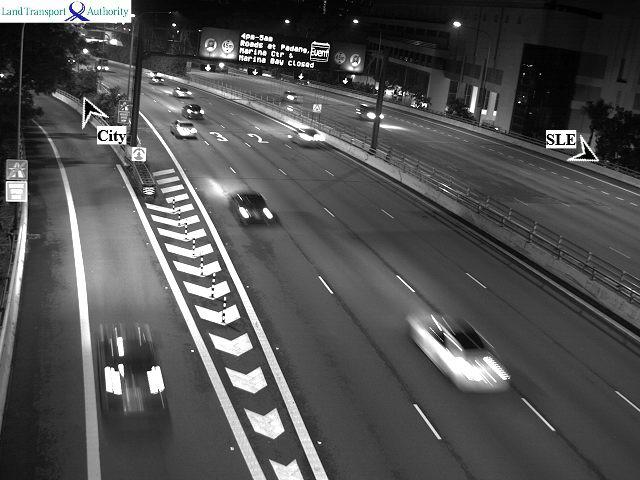

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image2019_0)

### Step 9: Detect common objects
With the read image, you can then use .detect_common_objects method from cvlib with the image. 

A few things to note about the parameters in the method:
1. model = 'yolov4'
2. enable_gpu = True

After you run the code, you'll have to wait a bit for cvlib to download the computer vision model yolov4 weights and configurations.

Refer to the documentation for the example code at the bottom (don't forget the extra parameters).

In [ ]:
# Step 9: Detect common objects 
bbox, label, conf = cv.detect_common_objects(image2019_0, model = 'yolov4', enable_gpu = True)

### Step 10: Count length of label
If you followed the documentation, you should have three variables after using .detect_common_objects method.

The label is a list containing the objects that the model detected. Print the length of the list to see how many vehicles were detected.

In [ ]:
# Step 10: Print length of label
len(label)

6

### Step 11: Draw bounding box in image
Use draw_bbox to draw the bounding box around the image and save the results in a new variable.

Use the imshow method from plt to show the drawn image. Use .figure to change the figure size if you'd like it bigger.

We won't be plotting the bounding boxes hereon, but it is nice to plot and see what was detected on our image.

<details>
    <summary><font color = 'green'>Click here once to see if your results match with ours.</font></summary>
    <div>
        <img src = 'https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectComputerVisionTraffic/BoundingBoxExample.png'>
    </div>
</details>

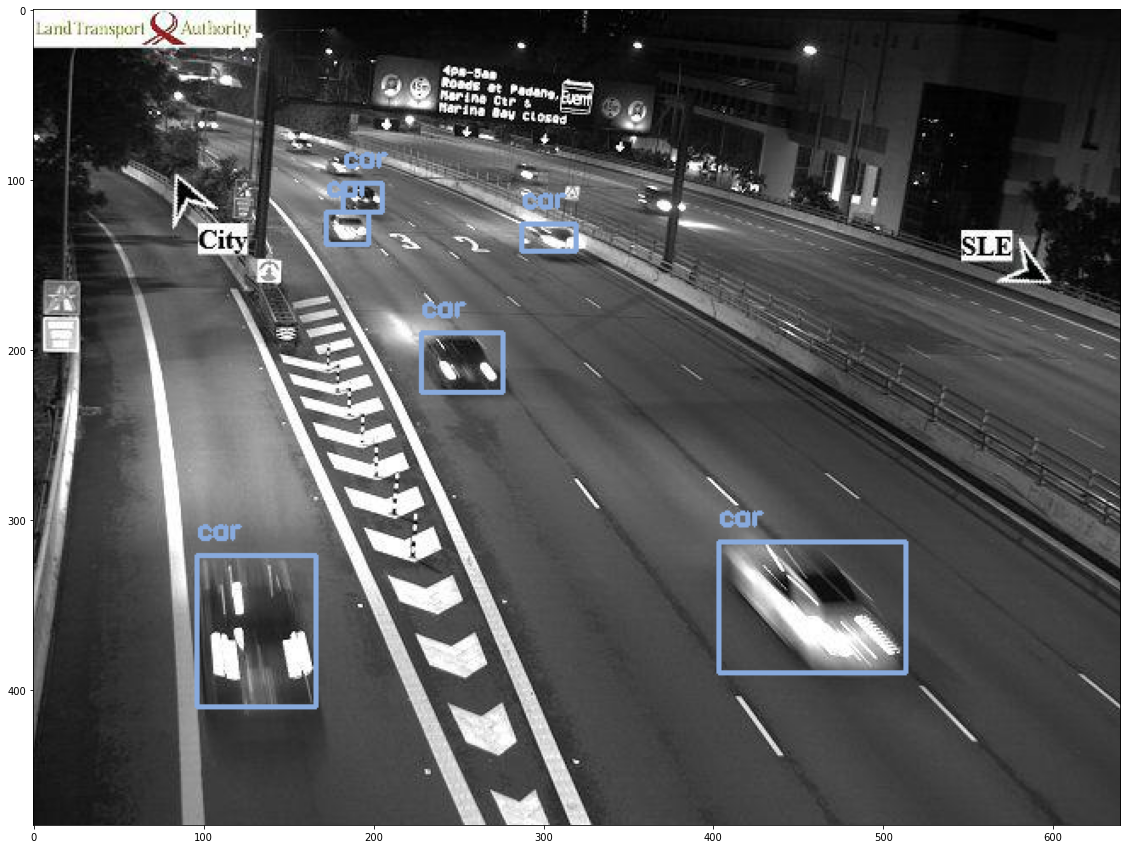

In [ ]:
# Step 11a: Draw bounding box
output_image=draw_bbox(image2019_0, bbox, label, conf)

# Step 11b: Plot the output image with .imshow
plt.figure(figsize=(20,15))
plt.imshow(output_image)
plt.show()

# All image analysis
Now that we've done the basic image analysis, let's continue and analyze them all! 

### Step 12: Write getLabelCount
We'll write a function, getLabelCount, that takes in two arguments:
1. index
2. folder_path

And returns a value:
- len(label)

We'll loop through a DataFrame's index, construct the PATH to the image in the image folder, and then detect the objects in the image.

The function then returns the length of label

Make sure you have a try-except block, where you try to detect the labels in the image and if an exception occurs just set label to have an empty list.

<details>
  <summary>Click here once if you're unsure and need pseudocode</summary>
  <ol>
    <li><strong>Define</strong> getLabelCount that takes in two arguments - (<font color='red'>index</font>, <font color='green'>folder_path</font>)</li>
    <li>Declare a variable temp_path that takes <font color='green'>folder_path</font> and combines it with the current value of the <font color='red'>index</font>, and '.jpg'</li>
    <li>Start a try/except block, where you first try to</li>
      <ul>
        <li>Use the .imread method with the the temp_path, and save it in a variable named temp_img</li> 
        <li>Get the bbox+label+conf with the .detect_common_objects method (don't forget the model and enable_gpu)</li>
      </ul>
    <li>If an exception occurs, just set label to be an empty list</li>
    <li>Return the length of the label</li>
  </ol>
</details>

In [36]:
# Step 12: Write getLabelCount
def getLabelCount(index, folder_path):
  temp_path=folder_path+str(index)+'.jpg'
  try:
    temp_img=cv2.imread(temp_path)
    bbox, label, conf = cv.detect_common_objects(temp_img, model = 'yolov3', enable_gpu = True)
  except Exception as error:
    label=[]
  return len(label)

### Step 13: Test getLabelCount
Run the function with your first image in the car_image_2019_Jan folder, to see if you get
- 6

Use a for loop and run the function with your first five images as well to see if you can print the length of the labels in each image:
- 6
- 3
- 2
- 5
- 4

Don't worry if the numbers don't match exactly, but you should be able to count the number of cars in 0.jpg to 4.jpg from 2019.

In [ ]:
# Step 13: Test getLabelCount
for i in df2019.index[:5]:
  print(getLabelCount(i, '/content/drive/MyDrive/Project CV x Traffic/car_image_2019_Jan/'))

6
3
2
5
4


### Step 14: Get a list of getLabelCount for 2019
Once you're confident that your function works, let's get a list of the label length from all the images in 2019.

Use a for loop to loop through the 2019 DataFrame's index, and run getLabelCount to append its results into a list.

At the end, you should have a list of lengths of label.

There's no need for concurrency since the GPU-enabled cvlib is fast enough and your run will crash if you use concurrency.

Once again, <strong>make sure you have a try-except block in your function</strong> because you don't want to spend 4 hours running this and realizing at the last step that your list is not the same length as your DataFrame.

<font color='red'><strong>Allocate 4 hours for this Step.</strong></font>

In [ ]:
### Step 14: Get a list of getLabelCount tuples for 2019
LabelCount2019=pd.DataFrame(columns = ['index', 'num_cars'])
save=np.linspace(0,len(df2019.index)-1,30).astype(int)
for i in df2019.index:
  num_cars = getLabelCount(i, '/content/drive/MyDrive/Project CV x Traffic/car_image_2019_Jan/')
  LabelCount2019=LabelCount.append({'index': i, 'num_cars': num_cars}, ignore_index=True)
  if i in save:
    LabelCount2019.to_csv('LabelCount2019.csv', index=None)
    !cp LabelCount2019.csv "/content/drive/MyDrive/Project CV x Traffic/"
    print("saved {0} records!".format(i))
  print(i, "{:.2%}".format(len(LabelCount2019)/ len(df2019.index)))

In [ ]:
## continuation version
LabelCount2019=pd.read_csv('/content/drive/MyDrive/Project CV x Traffic/LabelCount2019.csv')
lastread=LabelCount2019['index'].iloc[-1]
save=np.linspace(0,len(df2019.index)-1,30).astype(int)
for i in df2019.index[lastread+1:]:
  num_cars = getLabelCount(i, '/content/drive/MyDrive/Project CV x Traffic/car_image_2019_Jan/')
  LabelCount2019=LabelCount2019.append({'index': i, 'num_cars': num_cars}, ignore_index=True)
  if i in save:
    LabelCount2019.to_csv('LabelCount2019.csv', index=None)
    !cp LabelCount2019.csv "/content/drive/MyDrive/Project CV x Traffic/"
    print("saved {0} records!".format(i))
  print(i, "{:.2%}".format(len(LabelCount2019)/ len(df2019.index)))

### Step 15: Add the length of labels to the 2019 DataFrame
Well done! Add a new column called num_cars to the 2019 DataFrame with the list you created in Step 14. 

![2019FinalDataFrame](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectComputerVisionTraffic/2019FinalDataFrame.png)

You should see something like after you add the new column.

In [29]:
LabelCount2019=pd.read_csv('/content/drive/MyDrive/Project CV x Traffic/LabelCount2019.csv')

In [38]:
len(df2019)

30236

In [39]:
len(LabelCount2019)

30236

In [40]:
# Step 15: Add a new column named num_cars
df2019['num_cars']=LabelCount2019['num_cars']

### Step 16: Export the DataFrame into CSV
Do this Step as soon as you can! Imagine running 4 hours on getting the number of vehicles in your image but losing the data without saving.

Export the DataFrame with the additional num_cars column.

In [41]:
# Step 16: Export 2019 DataFrame into CSV
df2019.to_csv('Data2019v2.csv', index=None)
!cp Data2019v2.csv "/content/drive/MyDrive/Project CV x Traffic/"

### Step 17: Repeat Steps 14-16 for 2020 DataFrame
Now that you're done with the 2019 Jan data, next up - 2020 Jan data. 

You'll have to allocate another 4 hours for this so you can consider taking a break before coming back to this.

In [ ]:
# Step 17a: Get a list of number of vehicles 
LabelCount2020=pd.DataFrame(columns = ['index', 'num_cars'])
save=np.linspace(0,len(df2020.index)-1,30).astype(int)
for i in df2020.index:
  num_cars = getLabelCount(i, '/content/drive/MyDrive/Project CV x Traffic/car_image_2020_Jan/')
  LabelCount2020=LabelCount2020.append({'index': i, 'num_cars': num_cars}, ignore_index=True)
  if i in save:
    LabelCount2020.to_csv('LabelCount2020.csv', index=None)
    !cp LabelCount2020.csv "/content/drive/MyDrive/Project CV x Traffic/"
    print("saved {0} records!".format(i))
  print(i, "{:.2%}".format(len(LabelCount2020)/ len(df2020.index)))

In [47]:
## continuation version
LabelCount2020=pd.read_csv('/content/drive/MyDrive/Project CV x Traffic/LabelCount2020.csv')
lastread=LabelCount2020['index'].iloc[-1]
save=np.linspace(0,len(df2020.index)-1,30).astype(int)
for i in df2020.index[lastread+1:]:
  num_cars = getLabelCount(i, '/content/drive/MyDrive/Project CV x Traffic/car_image_2020_Jan/')
  LabelCount2020=LabelCount2020.append({'index': i, 'num_cars': num_cars}, ignore_index=True)
  if i in save:
    LabelCount2020.to_csv('LabelCount2020.csv', index=None)
    !cp LabelCount2020.csv "/content/drive/MyDrive/Project CV x Traffic/"
    print("saved {0} records!".format(i))
  print(i, "{:.2%}".format(len(LabelCount2020)/ len(df2020.index)))

28908 96.56%
28909 96.56%
28910 96.56%
28911 96.57%
28912 96.57%
28913 96.57%
28914 96.58%
28915 96.58%
28916 96.58%
28917 96.59%
28918 96.59%
28919 96.59%
28920 96.60%
28921 96.60%
28922 96.60%
28923 96.61%
28924 96.61%
28925 96.61%
28926 96.62%
28927 96.62%
28928 96.62%
28929 96.63%
28930 96.63%
28931 96.63%
28932 96.64%
28933 96.64%
28934 96.64%
28935 96.65%
28936 96.65%
28937 96.65%
28938 96.66%
28939 96.66%
28940 96.66%
28941 96.67%
28942 96.67%
28943 96.67%
28944 96.68%
28945 96.68%
28946 96.68%
28947 96.69%
28948 96.69%
28949 96.69%
28950 96.70%
28951 96.70%
28952 96.70%
28953 96.71%
28954 96.71%
28955 96.71%
28956 96.72%
28957 96.72%
28958 96.72%
28959 96.73%
28960 96.73%
28961 96.73%
28962 96.74%
28963 96.74%
28964 96.74%
28965 96.75%
28966 96.75%
28967 96.75%
28968 96.76%
28969 96.76%
28970 96.76%
28971 96.77%
28972 96.77%
28973 96.77%
28974 96.78%
28975 96.78%
28976 96.78%
28977 96.79%
28978 96.79%
28979 96.79%
28980 96.80%
28981 96.80%
28982 96.80%
28983 96.81%
28984 96.81%

In [48]:
LabelCount2020.to_csv('LabelCount2020.csv', index=None)
!cp LabelCount2020.csv "/content/drive/MyDrive/Project CV x Traffic/"

In [49]:
LabelCount2020=pd.read_csv('/content/drive/MyDrive/Project CV x Traffic/LabelCount2020.csv')

In [50]:
len(LabelCount2020)

29940

In [51]:
len(df2020)

29940

In [52]:
# Step 17b: Create a new column named num_cars in the 2020 DataFrame with the list
df2020['num_cars']=LabelCount2020['num_cars']

In [53]:
# Step 17c: Export the DataFrame as CSV
df2020.to_csv('Data2020v2.csv', index=None)
!cp Data2020v2.csv "/content/drive/MyDrive/Project CV x Traffic/"

# End of Part IV
Wew, that took a really long time didn't it?

You did it though, and persevered! In this Part, you successfully employed OpenCV to count the number of vehicles on the road.

Next Part, we will finally analyze the data, and compare the number of vehicles captured by camera ID 1709. 